<a href="https://colab.research.google.com/github/katerinbarrera21/Simulacion/blob/main/tareas2/09simulacionLavadoCarros3tiposConRetraso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctica Propuesta- SimPy SED
Modifique el código anterior a fin de incorporar los siguientes cambios:

Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:

* Bus: 15- 20 minutos
* Automóvil: 7-10 minutos
* Furgoneta: 12-15 minutos

Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:

* Bus: 4 minutos
* Automóvil: 1 minuto
* Furgoneta: 2 minutos

Identificar el recurso maquina dentro de la simulación
Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado

Generar llegada de vehiculos de 1 - 2 minutos, por 60 minutos de lavado, el tipo de vehiculo es generado aleatorialmente.

In [ ]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import simpy
import random
import matplotlib.pyplot as plt


Lavanderia UPS
Llega vehiculo: Vehiculo-1 de tipo automovil a la hora 0.00. 
Llega vehiculo: Vehiculo-2 de tipo automovil a la hora 0.00. 
Llega vehiculo: Vehiculo-3 de tipo bus a la hora 0.00. 
Llega vehiculo: Vehiculo-4 de tipo bus a la hora 0.00. 
Llega vehiculo: Vehiculo-5 de tipo bus a la hora 0.00. 
Entra vehiculo a lavarse: Vehiculo-1 de tipo automovil a la hora 0.00.
Vehiculo [Vehiculo-1] lavado de tipo automovil a las 0.00.
Entra vehiculo a lavarse: Vehiculo-2 de tipo automovil a la hora 0.00.
Vehiculo [Vehiculo-2] lavado de tipo automovil a las 0.00.
Entra vehiculo a lavarse: Vehiculo-3 de tipo bus a la hora 0.00.
Vehiculo [Vehiculo-3] lavado de tipo bus a las 0.00.
Entra vehiculo a lavarse: Vehiculo-4 de tipo bus a la hora 0.00.
Vehiculo [Vehiculo-4] lavado de tipo bus a las 0.00.
TRANSLADO vehiculo => Vehiculo-1  a la hora 1.00.
TRANSLADO vehiculo => Vehiculo-2  a la hora 1.00.
movilizado
movilizado
TRANSLADO vehiculo => Vehiculo-3  a la hora 4.00.
TRANSLADO vehiculo => Veh

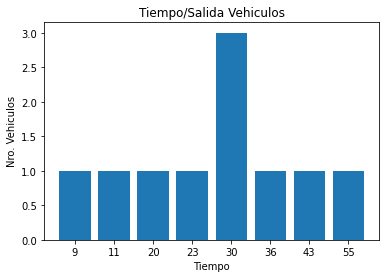

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 4
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 60
TIPOSvEHICULOS= ["bus", "automovil", "furgoneta"]
countTiposVehiculos= 2
INTERVALO_RETRASO = 1
#traslado 
#bus 4 min 
#automovil 1 min 
#furgoneta 2 min 
#Bus: 15- 20 minutos
#Automóvil: 7-10 minutos
#Furgoneta: 12-15 minutos
# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
# Esto permite graficar o generar los resultados
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo, tipoVehiculo):
      

        # ---> Modificamos el tiempo de lavado 5-11
        if tipoVehiculo == "bus":
          tiempoLavado = random.randint(self.tiempo_lavado+5,self.tiempo_lavado+10)
          yield self.env.timeout(tiempoLavado)
          print('ESTE ES el tiempo de lavado %s ' % (tiempoLavado))
          print('ESTE ES vehiculo %s ' % (vehiculo))


        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
          print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))


        if tipoVehiculo == "automovil":
          tiempoLavado = random.randint(self.tiempo_lavado-3,self.tiempo_lavado)
          yield self.env.timeout(tiempoLavado)
          print('ESTE ES el tiempo de lavado %s ' % (tiempoLavado))
          print('ESTE ES vehiculo %s ' % (vehiculo))

        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
          print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))

        if tipoVehiculo == "furgoneta":
          tiempoLavado = random.randint(self.tiempo_lavado-3,self.tiempo_lavado)
          yield self.env.timeout(tiempoLavado)
          print('ESTE ES el tiempo de lavado %s ' % (tiempoLavado))
          print('ESTE ES vehiculo %s ' % (vehiculo))

        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
          print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))

    def retrasoPorMovilidad(self, vehiculo, tipoVehiculo):
        # ---> Modificamos el tiempo de lavado 5-11
        if tipoVehiculo == "bus":

          yield self.env.timeout(4)
          print('TRANSLADO vehiculo => %s  a la hora %.2f.' % (vehiculo, env.now))
    
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90


        if tipoVehiculo == "automovil":
          yield self.env.timeout(1)
          print('TRANSLADO vehiculo => %s  a la hora %.2f.' % (vehiculo, env.now))
       
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90

        if tipoVehiculo == "furgoneta":
          yield self.env.timeout(2)
          print('TRANSLADO vehiculo => %s  a la hora %.2f.' % (vehiculo, env.now))
     
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90


    
def llegada_vehiculo(env, nombre, tipoVehiculoID, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s de tipo %s a la hora %.2f. ' % (nombre, tipoVehiculoID, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s de tipo %s a la hora %.2f.' % (nombre,tipoVehiculoID, env.now))
        # Procesamos la operacion de lavado
         # Procesamos la operacion de lavado
        print('Vehiculo [%s] lavado de tipo %s a las %.2f.' % (nombre, tipoVehiculoID, env.now))
        yield env.process(lavanderia.retrasoPorMovilidad(nombre, tipoVehiculoID))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print ('movilizado')
        yield env.process(lavanderia.lavar_vehiculo(nombre, tipoVehiculoID))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('--- TERMINO EN TIEMPO Vehiculo [%s] lavado de tipo %s a las %.2f.' % (nombre, tipoVehiculoID, env.now))


        # --> Agegamos al diccionario para obtener los tiempos de lavado
        k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
    if k in tiempo:
        tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
    else:
        tiempo[k]=1 # Por defecto empezamos con el primer vehiculo

def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        tipo=random.randint(countTiposVehiculos-2, countTiposVehiculos)
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1), TIPOSvEHICULOS[tipo], lavanderia))

    # Ejecutamos la simulacion
    while True:
        tipo=random.randint(countTiposVehiculos-2, countTiposVehiculos)
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1), TIPOSvEHICULOS[tipo], lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()